# Example using crosslib data and library

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import crosslib

# Load data
isnp = '010' # redshift 0; snapshot index '000' to '010'
realspace = crosslib.load_power2d(isnp, 0) # lambda = 0 for real space
zspace = crosslib.load_power2d(isnp, 1) # lambda = 1 for redshift space

param = crosslib.load_param(isnp) # dict of paramters
print(param)

{'redshift': 0.0, 'a': 1.0, 'H': 100.0, 'D': 1.0, 'f': 0.5204670159259687}


## Simulation data

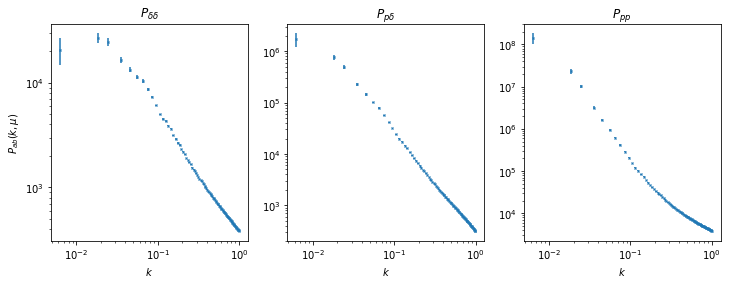

In [6]:
d = realspace
imu = 9

plt.figure(figsize=(12, 4))

# dd
plt.subplot(1, 3, 1)
plt.title('$P_{\\delta\\delta}$')
plt.xlabel('$k$')
plt.ylabel('$P_{ab}(k, \\mu)$')
plt.xscale('log')
plt.yscale('log')
plt.errorbar(d['k'][:, imu], d['summary']['Pdd'][:, imu], d['summary']['dPdd'][:, imu], None, 'x',
            markersize=2)

# pd
plt.subplot(1, 3, 2)
plt.title('$P_{p\\delta}$')
plt.xlabel('$k$')
plt.xscale('log')
plt.yscale('log')
plt.errorbar(d['k'][:, imu], d['summary']['Ppd'][:, imu], d['summary']['dPpd'][:, imu], None, 'x',
            markersize=2)

# pd
plt.subplot(1, 3, 3)
plt.title('$P_{pp}$')
plt.xlabel('$k$')
plt.xscale('log')
plt.yscale('log')
plt.errorbar(d['k'][:, imu], d['summary']['Ppp'][:, imu], d['summary']['dPpp'][:, imu], None, 'x',
            markersize=2)

plt.show()

In [3]:
# see doc
?crosslib.load_power2d
# ?crosslib.load_linear_power
# ?crosslib.load_halofit_power
# ?crosslib.load_theta_power_bel

## Thoretical models

Theoretical power spectra
$P_{\delta\delta}$, $P_{\delta\theta}$, and $P_{\theta\theta}$.

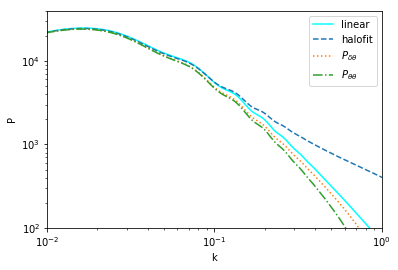

In [4]:
isnp = '010'

# Linear power spectrum
linear = crosslib.load_linear_power(isnp)

# Nonlinear matter power spectrum
halofit = crosslib.load_halofit_power(isnp)

# Velocity dispersion power spectrum
bel = crosslib.load_theta_power_bel(isnp, Ptt_simple=False)

plt.figure()
plt.ylabel('P')
plt.xlabel('k')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01, 1.0)
plt.ylim(100, 4.0e4)

plt.plot(linear['k'], linear['P'], color='cyan', label='linear')
plt.plot(halofit['k'], halofit['P'], '--', label='halofit')
plt.plot(bel['k'], bel['Pdt'], ':', label='$P_{\\delta\\theta}$')
plt.plot(bel['k'], bel['Ptt'], '-.', label='$P_{\\theta\\theta}$')

plt.legend()
plt.show()

## Momentum power spectra dispersion model

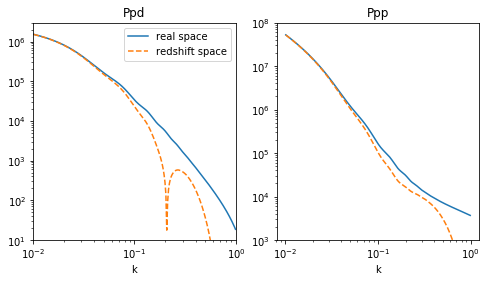

In [37]:
idx = np.logical_and(0.01 <= bel['k'], bel['k'] <= 1.0)
k = bel['k'][idx]
mu = (imu + 0.5)/10

# P_delta_delta, P_delta_theta, and P_theta_theta
Pdd = bel['Pdd'][idx]
Pdt = bel['Pdt'][idx]
Ptt = bel['Ptt'][idx]
f = param['f']
s = 3.0 # damping paramter sigma_v 

def damp(x):
    """ exponential damping function"""
    return np.exp(-x**2)

def damp_deriv(x):
    """ dD(x)/dx """
    return -2.0*x*np.exp(-x**2)


D = damp(k*mu*s)
Dp = damp_deriv(k*mu*s)

# redshift-space Ps_dd
Ps = (Pdd + 2*f*mu**2*Pdt + f**2*mu**4*Ptt)*D

# realspace P_pd
Pdp = (f*mu**2*Pdt + f**2*mu**3*Ptt)/k

# Redshift-space Ps_pd
Pdps = Pdp*D + 0.5*s*Ps*Dp

plt.figure(figsize=(8, 4))

#
# pd cross-power
#
plt.subplot(1, 2, 1)
plt.title('Ppd')
plt.xlabel('k')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01, 1.0)
plt.ylim(10, 3.0e6)
plt.plot(k, Pdp, label='real space')
plt.plot(k, np.abs(Pdps), '--', label='redshift space')
plt.legend()

#
# pp auto-power
#
Puu = f**2*mu**2*Ptt/k**2
Prand = Pdd*s**2
P1 = s*f*mu*Dp*(Pdt + f*mu**2*Ptt)/k
P2 = 0.25*s**2*(Dp/D)**2*Ps

plt.subplot(1, 2, 2)
plt.title('Ppp')
plt.xlabel('k')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1000, 1.0e8)

plt.plot(k, Puu + Prand)
plt.plot(k, (Puu + Prand)*D + P1 + P2, '--')

plt.show()